In [1]:
import tkinter as tk
from tkinter import simpledialog, messagebox
import numpy as np
import cv2 as cv
from skimage.draw import polygon
from skimage.segmentation import chan_vese
import matplotlib.pyplot as plt

In [2]:
def get_user_option():
    root = tk.Tk()
    root.withdraw()
    option = simpledialog.askstring("Input", "Please select an option: 'boundary' or 'center'")
    return option

def show_message(message):
    root = tk.Tk()
    root.withdraw()
    messagebox.showinfo("Information", message)
    root.destroy()

def chanvese(image, option, interactive=True):
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image1 = np.copy(image)
    image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
    if interactive:
        %matplotlib qt
        fig, ax = plt.subplots()
        ax.imshow(image1, cmap='gray')
        if option == "boundary":
            show_message("You've selected the boundary option. Please click to select the boundary points, then close the window.")
            boundary = plt.ginput(-1)
            boundary = np.array(boundary)
            plt.close()
            mask = np.zeros(image_gray.shape, dtype=bool)
            rr, cc = polygon(boundary[:, 1], boundary[:, 0], mask.shape)
            mask[rr, cc] = True

        elif option == "center":
            show_message("You've selected the center option. Please click to select the center point, then close the window.")
            center = plt.ginput()
            center = np.array(center)
            plt.close()
            x, y = int(center[0][0]), int(center[0][1])
            mask = np.zeros(image_gray.shape, dtype=bool)
            c = [x-4, x+4, x+4, x-4]
            r = [y+4, y+4, y-4, y-4]
            rr, cc = polygon(r, c, mask.shape)
            mask[rr, cc] = True
    else:
        _, binary_image = cv.threshold(image_gray, 127, 255, cv.THRESH_BINARY)
        white_points = np.argwhere(binary_image == 255)
        if len(white_points) == 0:
            raise ValueError("No white area found in the image.")
        center_point = white_points[len(white_points) // 2]
        x, y = center_point[1], center_point[0]
        mask = np.zeros(image_gray.shape, dtype=bool)
        c = [x-4, x+4, x+4, x-4]
        r = [y+4, y+4, y-4, y-4]
        rr, cc = polygon(r, c, mask.shape)
        mask[rr, cc] = True

    bw = chan_vese(image_gray, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=200, dt=0.5, init_level_set=mask)
    
    %matplotlib inline
    bw_show = (bw * 255).astype(np.uint8)
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    axs[0].imshow(image1)
    axs[0].set_title("Original Image")
    axs[1].imshow(bw_show, cmap='gray')
    axs[1].set_title("Binary Mask")
    axs[2].imshow(image_gray, cmap='gray')
    axs[2].imshow(bw, cmap='jet', alpha=0.5)
    axs[2].set_title("Selected")
    if interactive:
        plt.suptitle(f"Visualization of figures with '{option}' option")
    else:
        plt.suptitle(f"Visualization of figures with automatic option")
    plt.show()
    
    return bw


## Here's a GUI for choosing between center or boundary options. After selecting your preference, a popup will display your chosen option. Click "OK" and then choose either the center or the boundary of the area, depending on your selection.

#### the next cell shows the output for the center option on nevus.jpg

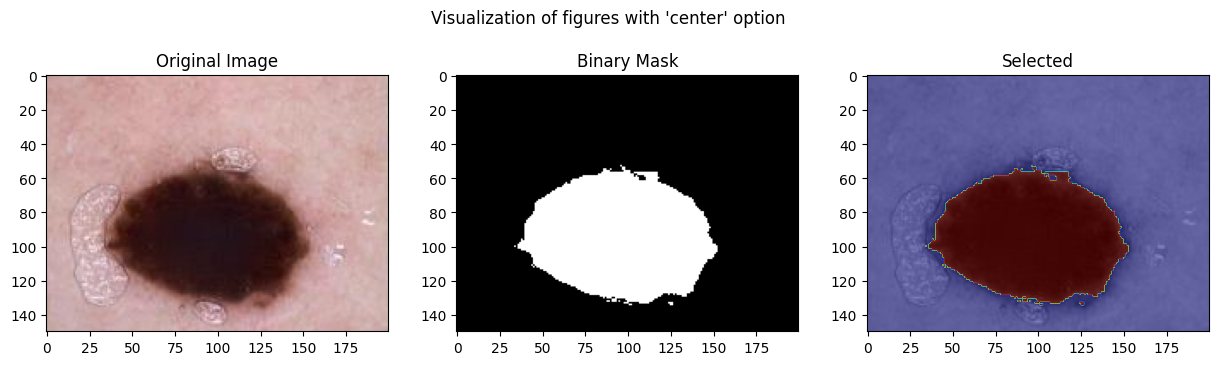

In [3]:
image = cv.imread('nevus.jpg')
option = get_user_option()
if option in ["boundary", "center"]:
    bw = chanvese(image, option)
else:
    show_message("Invalid option selected.")

#### the next cell shows the output for the boundary option on nevus.jpg

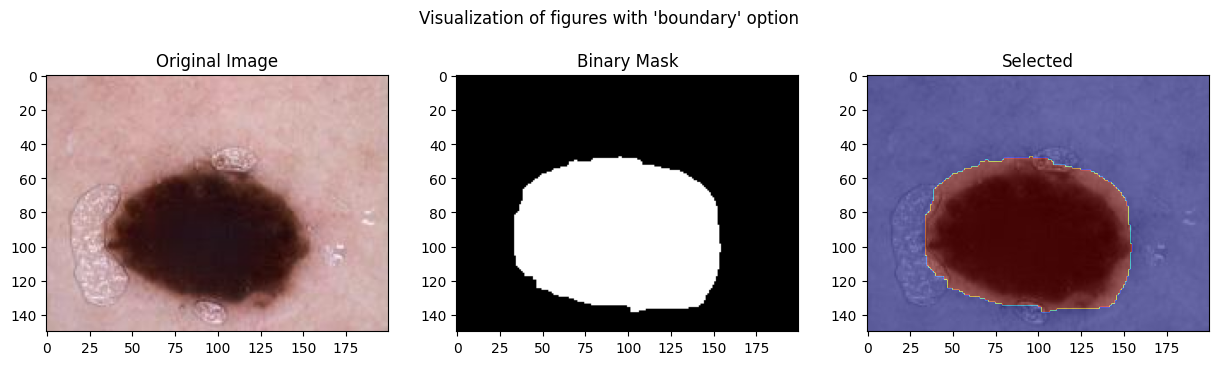

In [4]:
image = cv.imread('nevus.jpg')
option = get_user_option()
if option in ["boundary", "center"]:
    bw = chanvese(image, option)
else:
    show_message("Invalid option selected.")

#### the next cell shows the output for the centenr option on melanoma.jpg

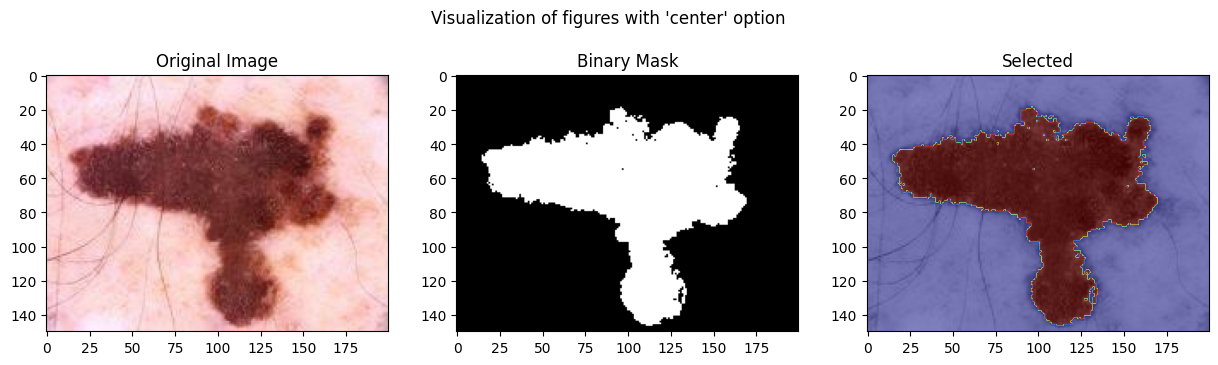

In [90]:
image = cv.imread('melanoma.jpg')
option = get_user_option()
if option in ["boundary", "center"]:
    bw = chanvese(image, option)
else:
    show_message("Invalid option selected.")

#### the next cell shows the output for the boundary option on melanoma.jpg


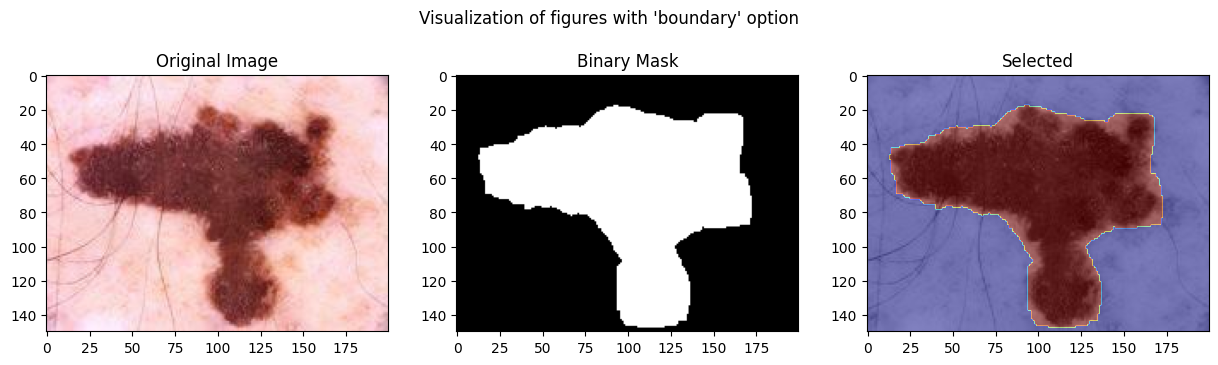

In [91]:
image = cv.imread('melanoma.jpg')
option = get_user_option()
if option in ["boundary", "center"]:
    bw = chanvese(image, option)
else:
    show_message("Invalid option selected.")

#### the next cell shows the output for the centenr option on MRI3.png


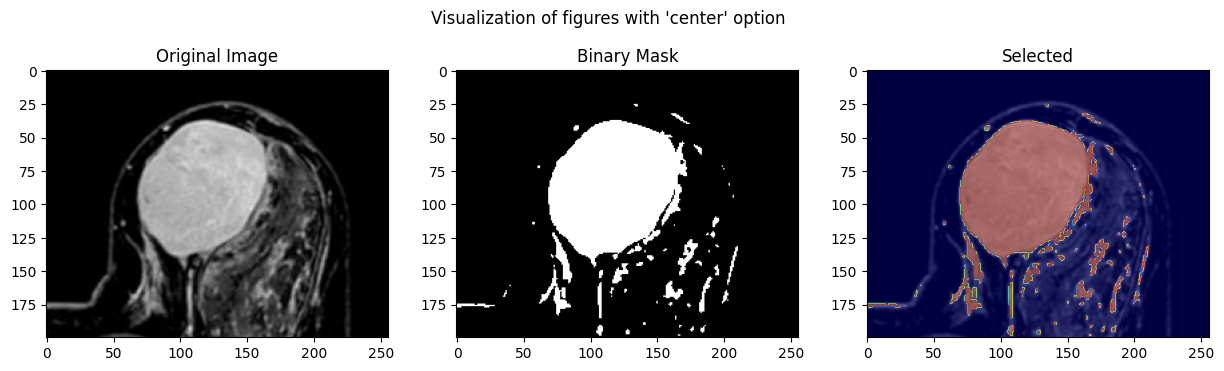

In [92]:
image = cv.imread('MRI3.png')
option = get_user_option()
if option in ["boundary", "center"]:
    bw = chanvese(image, option)
else:
    show_message("Invalid option selected.")

#### the next cell shows the output for the boundary option on MRI3.png


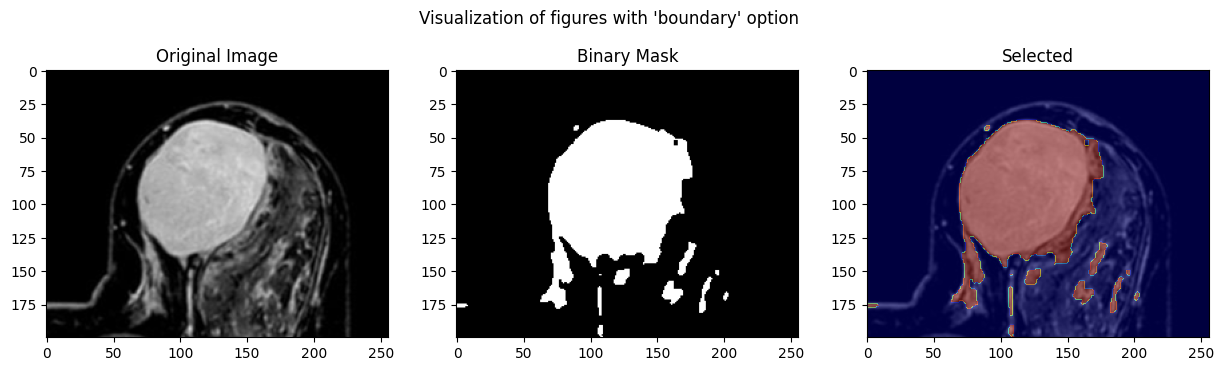

In [38]:
option = get_user_option()
if option in ["boundary", "center"]:
    bw = chanvese(image, option)
else:
    show_message("Invalid option selected.")

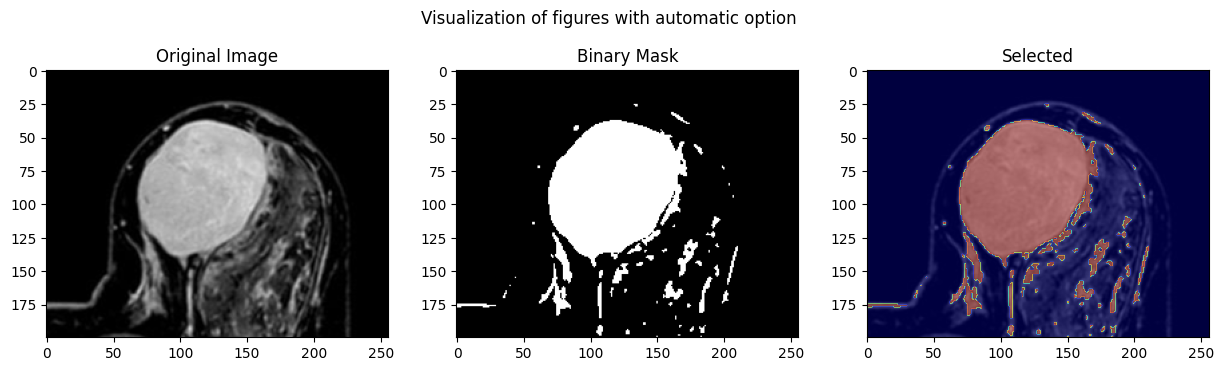

In [5]:
image = cv.imread('MRI3.png')
bw=chanvese(image, option, interactive=False)
